In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Math

from printUtils import getLatex

np.set_printoptions(precision=2)

# Load matrix values
# Matrix A, b and c
# vertex

A = np.array([
    [1,1,1],
    [1,0,0],
    [0,0,1],
    [0,3,1],
    [-1,0,0],
    [0,-1,0],
    [0,0,-1], 
])

b = np.array([
    [4],
    [2],
    [3],
    [6],
    [0],
    [0],
    [0],
])

# objective function
c = np.array([
    [1,3,2]
])

vertex = (0,0,0)

# vertex is the intersection of vector 1 and vector 5
# Important! always select in ascendent order 
# B = {1,2} is okay, but B={2,1} not good
B=(5,6,7)

In [2]:
# Running iterations

display(Math('\\ A = \\begin{bmatrix} \n%s\end{bmatrix}' % getLatex(A)))
display(Math('\\ b = \\begin{bmatrix} \n%s\end{bmatrix}' % getLatex(b)))
display(Math(
    '\\ Objective Function: c = \\begin{bmatrix} \n%s\end{bmatrix}' % getLatex(c)))
#display(Math('\\ A * d = \\begin{bmatrix} \n%s\end{bmatrix}' % matrix1))
#display(Math('\\ A * d = \\begin{bmatrix} \n%s\end{bmatrix}' % matrix1))

display(Math('\\ \hspace{1cm}'))


iteration_number = 1

while(True):

    display(Math('\\textbf{Iteration Number: \n%s}' % iteration_number))

    A_B = np.array([
        A[B[0]-1],  # vector 1
        A[B[1]-1],  # vector 5
        A[B[2]-1]
    ])
    display(
        Math('\\ A_B = \\begin{bmatrix} \n%s\end{bmatrix}' % getLatex(A_B)))

    b_B = np.array([
        b[B[0]-1],  # vector 1
        b[B[1]-1],  # vector 5
        b[B[2]-1]  # vector 5
    ])
    display(
        Math('\\ b_B = \\begin{bmatrix} \n%s\end{bmatrix}' % getLatex(b_B)))

    # calculating the inverse v = A_b^-1 *b_B
    A_B_i = np.linalg.inv(A_B)
    print("A inverse: ")
    display(
        Math('\\ A^-1_B = \\begin{bmatrix} \n%s\end{bmatrix}' % getLatex(A_B_i)))

    v = np.matmul(A_B_i, b_B)
    display(Math('\\textbf{ Associated feasible solutions: }'))
    display(
        Math('\\ A^-1_B * b_B = v = \\begin{bmatrix} \n%s\end{bmatrix}' % getLatex(v)))

    u = np.matmul(c, A_B_i)
    display(Math('\\textbf{ Reduced costs }'))
    display(Math('\\ u = \\begin{bmatrix} \n%s\end{bmatrix}' % getLatex(u)))

    display(
        Math('\\textbf{Negative numbers detected: \n%s}' % str(np.any(u < 0))))

    # checking if there are not negative values
    if(not np.any(u < 0)):
        display(
            Math('\\textbf{ All elements in u are positive, stop the execution! }'))
        break

    if(np.all((u == 0))):
        display(
            Math('\\textbf{ All elements in u are Zero, stop the execution! }'))
        break

    # continue calculation
    index_of_min = np.argmin(u)

    j = u[0][index_of_min]
    display(Math('\\text{ j : \n%s}' % B[index_of_min]))

    d = -1 * np.array([A_B_i[:, index_of_min]]).transpose()
    print(d)
    display(Math('\\ d = \\begin{bmatrix} \n%s\end{bmatrix}' % getLatex(d)))

    p1 = np.matmul(A, v)
    p2 = np.matmul(A, d)

    part1 = p2
    part2 = b - p1

    index = 0
    lambda_val = 0
    minIndex = 0  # k -> index  of min value

    # A(v + λd) = Av + λAd <= b
    display(Math('\\textbf{ Calculate:  lambda * d <= b - A*v}'))
    x = getLatex(part1)
    y = getLatex(part2)
    display(Math(
        '\\lambda * \\begin{bmatrix} \n%s\end{bmatrix} = \\begin{bmatrix} \n%s \end{bmatrix}' % (x, y)))

    for x in part1:
        if(x[0] == 0 or x[0] < 0):
            index += 1
            continue
        else:
            partial_cal = part2[index][0] / x[0]  # integer division

            print("partial cal: ", partial_cal)

            if(lambda_val == 0):
                lambda_val = partial_cal
                minIndex = index
            else:
                if(partial_cal < lambda_val):
                    lambda_val = partial_cal
                    minIndex = index
        index += 1

    print("##########################")
    print("minIndex: ", minIndex)
    display(Math('\\ k : \n%s' % (minIndex+1)))
    print("lambda_val value: ", lambda_val)
    # rename lambda to lambda in variables
    display(Math('\\lambda : \n%s' % lambda_val))
    print("u: ", u)
    print("index of min: ", index_of_min)

    # Replacing values in B
    print("B: ", B)
    display(Math('\\text{ B = {\n%s , \n%s , \n%s} }' % (B[0], B[1], B[2])))
    k = minIndex + 1
    B_aux = list(B)
    B_aux[index_of_min] = k
    B_aux.sort()
    B = tuple(B_aux)
    print("B: ", B)
    display(Math('\\text{ B = {\n%s , \n%s , \n%s} }' % (B[0], B[1], B[2])))
    iteration_number += 1
    # break;


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A inverse: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[0.]
 [1.]
 [0.]]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

partial cal:  4.0
partial cal:  2.0
##########################
minIndex:  3


<IPython.core.display.Math object>

lambda_val value:  2.0


<IPython.core.display.Math object>

u:  [[-1. -3. -2.]]
index of min:  1
B:  (5, 6, 7)


<IPython.core.display.Math object>

B:  (4, 5, 7)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A inverse: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[ 1.]
 [-0.]
 [ 0.]]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

partial cal:  2.0
partial cal:  2.0
##########################
minIndex:  0


<IPython.core.display.Math object>

lambda_val value:  2.0


<IPython.core.display.Math object>

u:  [[ 1. -1. -1.]]
index of min:  1
B:  (4, 5, 7)


<IPython.core.display.Math object>

B:  (1, 4, 7)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A inverse: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[-0.67]
 [-0.33]
 [ 1.  ]]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

partial cal:  3.0
partial cal:  2.9999999999999996
partial cal:  6.0
##########################
minIndex:  4


<IPython.core.display.Math object>

lambda_val value:  2.9999999999999996


<IPython.core.display.Math object>

u:  [[ 1.    0.67 -0.33]]
index of min:  2
B:  (1, 4, 7)


<IPython.core.display.Math object>

B:  (1, 4, 5)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A inverse: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

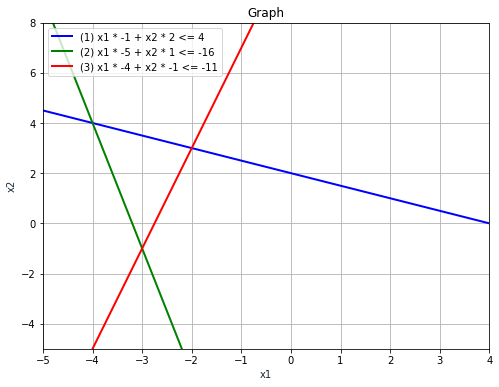

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
""" ONLY WORKS FOR 2D GRAPH """
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
A = np.array([
    [-1,2],  # vector 1
    [-5,1],  # vector 2
    [-4,-1],  # vector 3
])


b = np.array([
    [4],
    [-16],
    [-11]
])

x1 = np.linspace(-8, 20, 100)
plt.figure(figsize=(8, 6))

for i in range(len(A)):
    
    if A[i][0] != 0 and A[i][1] != 0:
        div = A[i][1]
        x2 = (x1 * A[i][0] + b[i][0])/div
        plt.plot(x1, x2, colors[i], label='({0}) x1 * {1} + x2 * {2} <= {3}'.format(
            i+1, A[i][0], div, b[i][0]), linewidth=2.0)
        # continue
    # validate if is a horizontal line
    if A[i][0] == 0 and A[i][1] != 0:
        x2 = b[i][0]/A[i][1]
        plt.axhline(x2, -5, 5, c=colors[i], label='({0}) x2 * {1} <= {2}'.format(
            i+1, A[i][1], b[i][0]))

    # validate if is a vertical line
    if A[i][0] != 0 and A[i][1] == 0:
        x2 = b[i][0]/A[i][0]
        plt.axvline(x2, -5, 5, c=colors[i], label='({0}) x1 * {1} <= {2}'.format(
            i+1, A[i][0], b[i][0]))


plt.title('Graph')
plt.xlabel('x1', color='#1C2833')
plt.ylabel('x2', color='#1C2833')
plt.ylim(-5,8)
plt.xlim(-5,4)
plt.legend(loc='upper left')


plt.grid()
plt.show()
